In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
insdf = pd.read_csv('insurance.csv')

In [4]:
insdf.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
insdf.rename(columns = {'expenses':'charges'}, inplace = True) 

In [6]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
insdf.shape

(1338, 7)

In [8]:
insdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
insdf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
insdf.corr()['charges'].value_counts()

0.299008    1
0.067998    1
0.198576    1
1.000000    1
Name: charges, dtype: int64

In [12]:
insdf.corr()

,age,bmi,children,charges
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
charges,0.299008,0.198576,0.067998,1.000000


In [13]:
insdf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

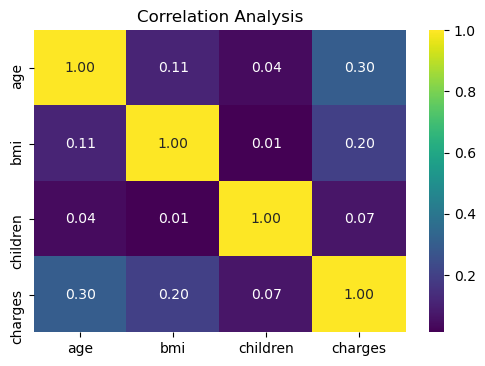

In [14]:
corr = insdf.corr()
#mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,annot=True,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")


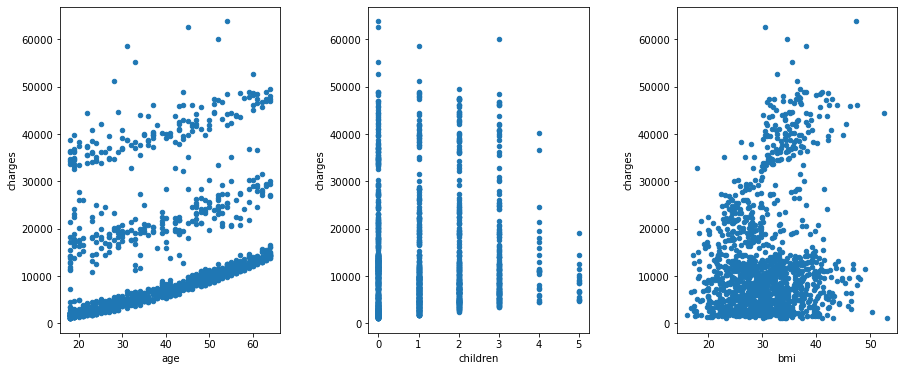

In [15]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
insdf.plot(kind='scatter', x='age', y='charges', ax=axes[0])
insdf.plot(kind='scatter', x='children', y='charges', ax=axes[1])
insdf.plot(kind='scatter', x='bmi', y='charges', ax=axes[2])

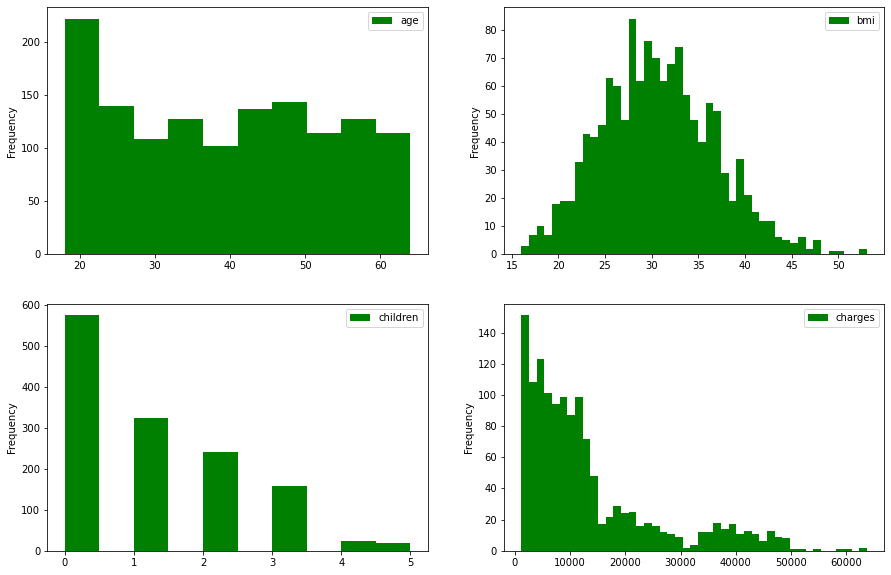

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

insdf.plot(kind='hist', y='age', ax=axes[0][0], color = 'green')
insdf.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'green', bins = 45)
insdf.plot(kind='hist', y='children', ax=axes[1][0], color = 'green', bins = 10)
insdf.plot(kind='hist', y='charges', ax=axes[1][1], color = 'green', bins = 45)

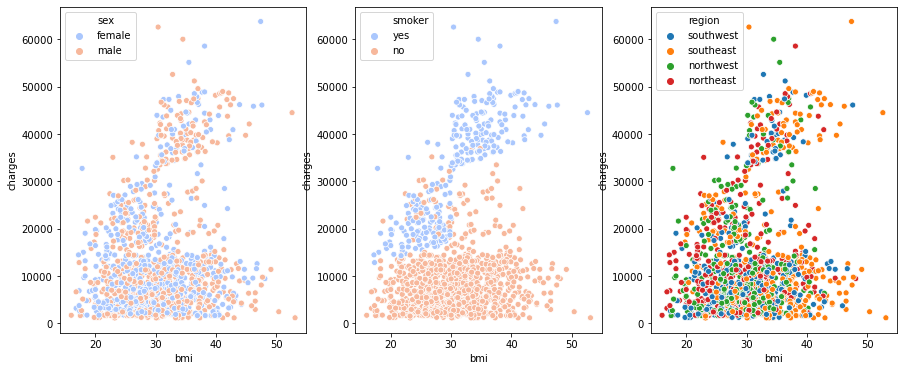

In [17]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='charges', ax=axes[0], data=insdf,hue='sex', palette='coolwarm')
sns.scatterplot(x='bmi', y='charges', ax=axes[1], data=insdf,hue='smoker', palette='coolwarm')
sns.scatterplot(x='bmi', y='charges', ax=axes[2], data=insdf,hue='region')

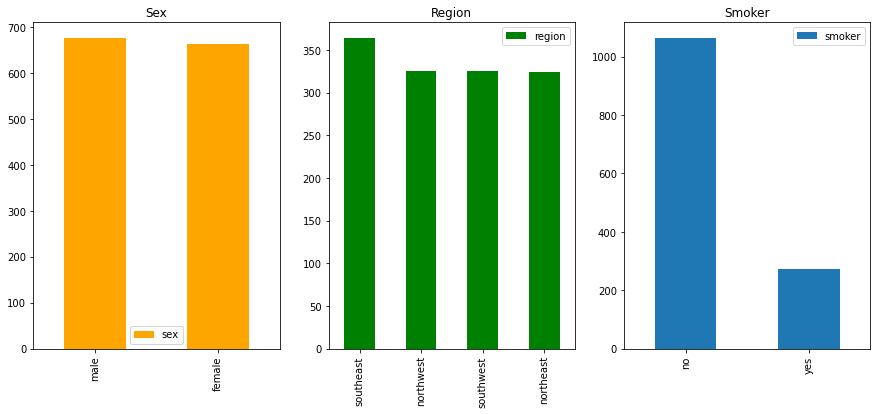

In [18]:
fig, axes = plt.subplots(ncols=3, figsize = (15,6))
insdf['sex'].value_counts().plot(kind='bar', color = 'orange', ax=axes[0],title="Sex", legend = 'sex') 
insdf['region'].value_counts().plot(kind='bar', color = 'green', ax=axes[1],title="Region", legend = 'region')
insdf['smoker'].value_counts().plot(kind='bar', ax=axes[2],title="Smoker", legend = 'smoker')

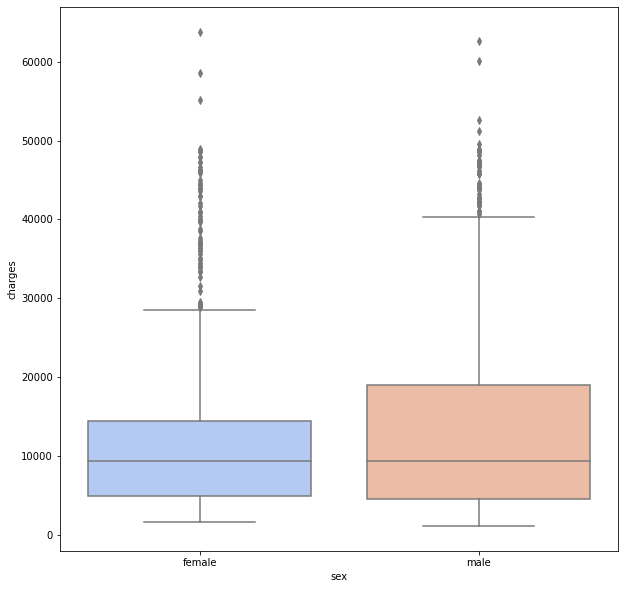

In [19]:
plt.figure(figsize = (10, 10)) # Make the figure larger
sns.boxplot(x='sex', y='charges', palette='coolwarm', data=insdf)

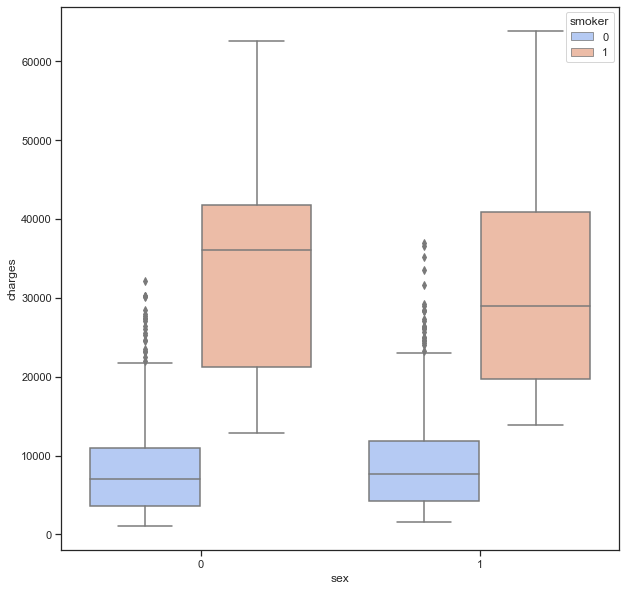

In [41]:
plt.figure(figsize = (10, 10)) # Make the figure larger
sns.boxplot(x='sex', y='charges', hue='smoker', palette='coolwarm', data=insdf)

Text(0.5, 1.0, 'Distribution of Charges')

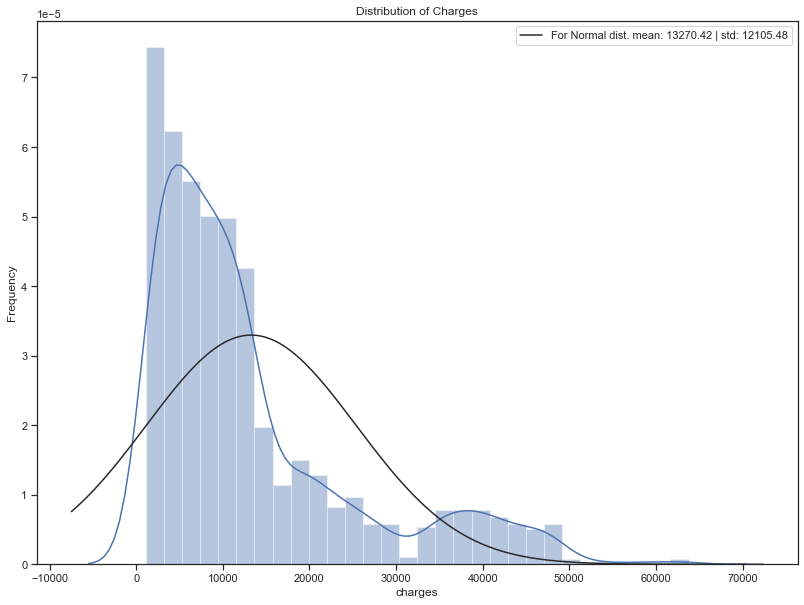

In [43]:
from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.distplot(insdf['charges'], fit=norm)
(mu,sigma)= norm.fit(insdf['charges'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Charges')

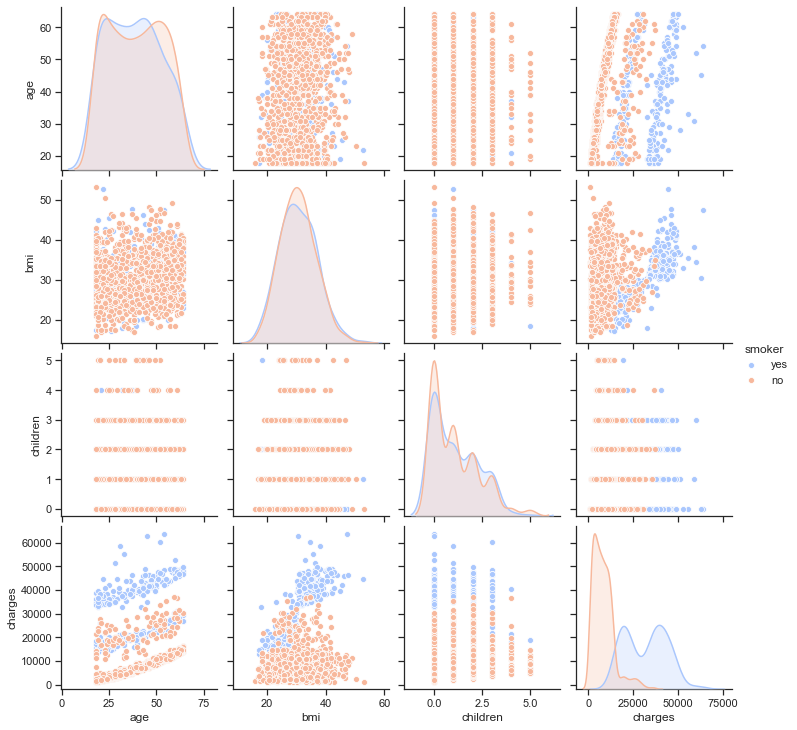

In [22]:
sns.set(style="ticks")
sns.pairplot(data=insdf, hue='smoker', palette='coolwarm')

In [23]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [24]:
insdf.drop(["region"], axis=1, inplace=True) 

In [25]:
insdf.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [26]:
# Changing binary categories to 1s and 0s
insdf['sex'] = insdf['sex'].map(lambda s :1  if s == 'female' else 0)
insdf['smoker'] = insdf['smoker'].map(lambda s :1  if s == 'yes' else 0)

In [27]:
insdf.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


Defining X and y parameters

X

corresponds to your float feature matrix of shape (n_samples, n_features) (aka. the design matrix of your training set)

y

is the float target vector of shape (n_samples,) (the label vector). In your case, label 0 could correspond to a spam example, and 1 to a ham one

In [28]:
X = insdf.drop(['charges'], axis = 1)
y = insdf.charges
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)

Shape of X:  (1338, 5)
Shape of y:  (1338,)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7952529674123328


Note that the train_test_split function already shuffles the training sets internally before splitting; otherwise, all class 0 and class 1 samples would have ended up in the training set, and the test set would consist of 45 samples from class 2. Via the random_state parameter, we provided a fixed random seed (random_state=1) for the internal pseudo-random number generator that is used for shuffling the datasets prior to splitting. Using such a fixed random_state ensures that our results are reproducible.


Linear regression is a popular regression learning algorithm that learns a model which is a
linear combination of features of the input example.

In [30]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53,11456.260710
610,8547.69,9934.793123
569,45702.02,37778.385938
1034,12950.07,15858.505279
198,9644.25,6953.500191
...,...,...
574,13224.06,14430.265988
1174,4433.92,6701.983467
1327,9377.90,11141.700468
817,3597.60,7201.002180


In [31]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

StandardScaler. StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale I introduced earlier

In [32]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.180051,-0.063607,-0.503736
1,1.548746,0.985155,-1.399832,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982538,-0.063607,-0.503736
3,-1.368757,0.985155,-1.014638,-0.892144,1.985167
4,-0.941805,0.985155,-1.367732,-0.892144,-0.503736


In [33]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84
131,13616.36
15,1837.24
1223,26125.67
1137,3176.29


In [51]:
def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    
    accuracy_model_train = r2_score(y_train, y_pred_model_train)
    print("Training Accuracy: ", accuracy_model_train)
    
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing Accuracy: ", accuracy_model_test)
    
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)
    
    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

In [35]:
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score, mean_squared_error  

In [36]:
from sklearn.linear_model import LinearRegression  

multiple_linear_reg = LinearRegression(fit_intercept=False)  
multiple_linear_reg.fit(X_train, y_train)  
model_summary(multiple_linear_reg, "Multiple_linear_Regression")

Multiple_linear_Regression
Training Accuracy:  -0.48955318862091035
Testing Accuracy:  -0.32407582691782677
RMSE for Training Data:  14589.270271020132
RMSE for Testing Data:  14437.97885483326
Accuracy for 20 - Fold Cross Predicted:  0.7164406277916135


Linear regression is a popular regression learning algorithm that learns a model which is a linear combination of features of the input example.

In [37]:
from sklearn.svm import SVR  

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  
support_vector_reg.fit(X_train, y_train)  
model_summary(support_vector_reg, "Support_Vector_Regressor")

Support_Vector_Regressor
Training Accuracy:  0.652232923332688
Testing Accuracy:  0.7343309955103848
RMSE for Training Data:  7049.361696268942
RMSE for Testing Data:  6467.26143175293
Accuracy for 20 - Fold Cross Predicted:  0.7009535008136862


Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples

In [38]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  
x_train_poly = polynomial_features.fit_transform(X_train)  
x_test_poly = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)

PolynomialFeatures
Training Accuracy:  0.8355789214701362
Testing Accuracy:  0.880945411305889
RMSE for Training Data:  4847.125990188415
RMSE for Testing Data:  4329.3534424717955
Accuracy for 20-Fold Cross Predicted:  0.8393113776367491


Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [39]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(X_train, y_train) 
model_summary(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression
Training Accuracy:  0.8694256881440832
Testing Accuracy:  0.8711939744446933
RMSE for Training Data:  4319.509514116047
RMSE for Testing Data:  4503.167101749359
Accuracy for 20 - Fold Cross Predicted:  0.8519568550673102


In the context of decision tree regression, the MSE is often also referred to as
within-node variance, which is why the splitting criterion is also better known as
variance reduction. To see what the line fit of a decision tree looks like, let us use
the DecisionTreeRegressor implemented in scikit-learn to model the nonlinear
relationship between the MEDV and LSTAT variables:

In [40]:
from sklearn.ensemble import RandomForestRegressor  

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
random_forest_reg.fit(X_train, y_train) 
model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Training Accuracy:  0.878251099532176
Testing Accuracy:  0.8969203533577584
RMSE for Training Data:  4170.979793736701
RMSE for Testing Data:  4028.43567685455
Accuracy for 20 - Fold Cross Predicted:  0.857751048313981


the random forest algorithm is an ensemble technique that combines multiple decision
trees. A random forest usually has a better generalization performance than an
individual decision tree due to randomness, which helps to decrease the model's
variance. Other advantages of random forests are that they are less sensitive to
outliers in the dataset and don't require much parameter tuning. The only parameter
in random forests that we typically need to experiment with is the number of trees in
the ensemble. The basic random forest algorithm for regression is almost identical to
the random forest algorithm for classification. The only difference is that we use the
MSE criterion to grow the individual decision trees, and the predicted target variable
is calculated as the average prediction over all decision trees.